# Dall' analogico al digitale

**Informazioni generali.** Studio di operatori logici NOT e NAND con 
Dettagli del setup:
* BS170 
* AD2 per l'acquisizione dati
* 
* convertitore tensione-corrente per guidare LED
* amplificatore a trans-impedenza per leggere i dati del fotodiodo

## Caratteristiche del BS107

Dal Datasheet i valori sono $V_{pinch-off}$     $V_{thr} = 1V-3V$ 

La piedinatura è la seguente












0


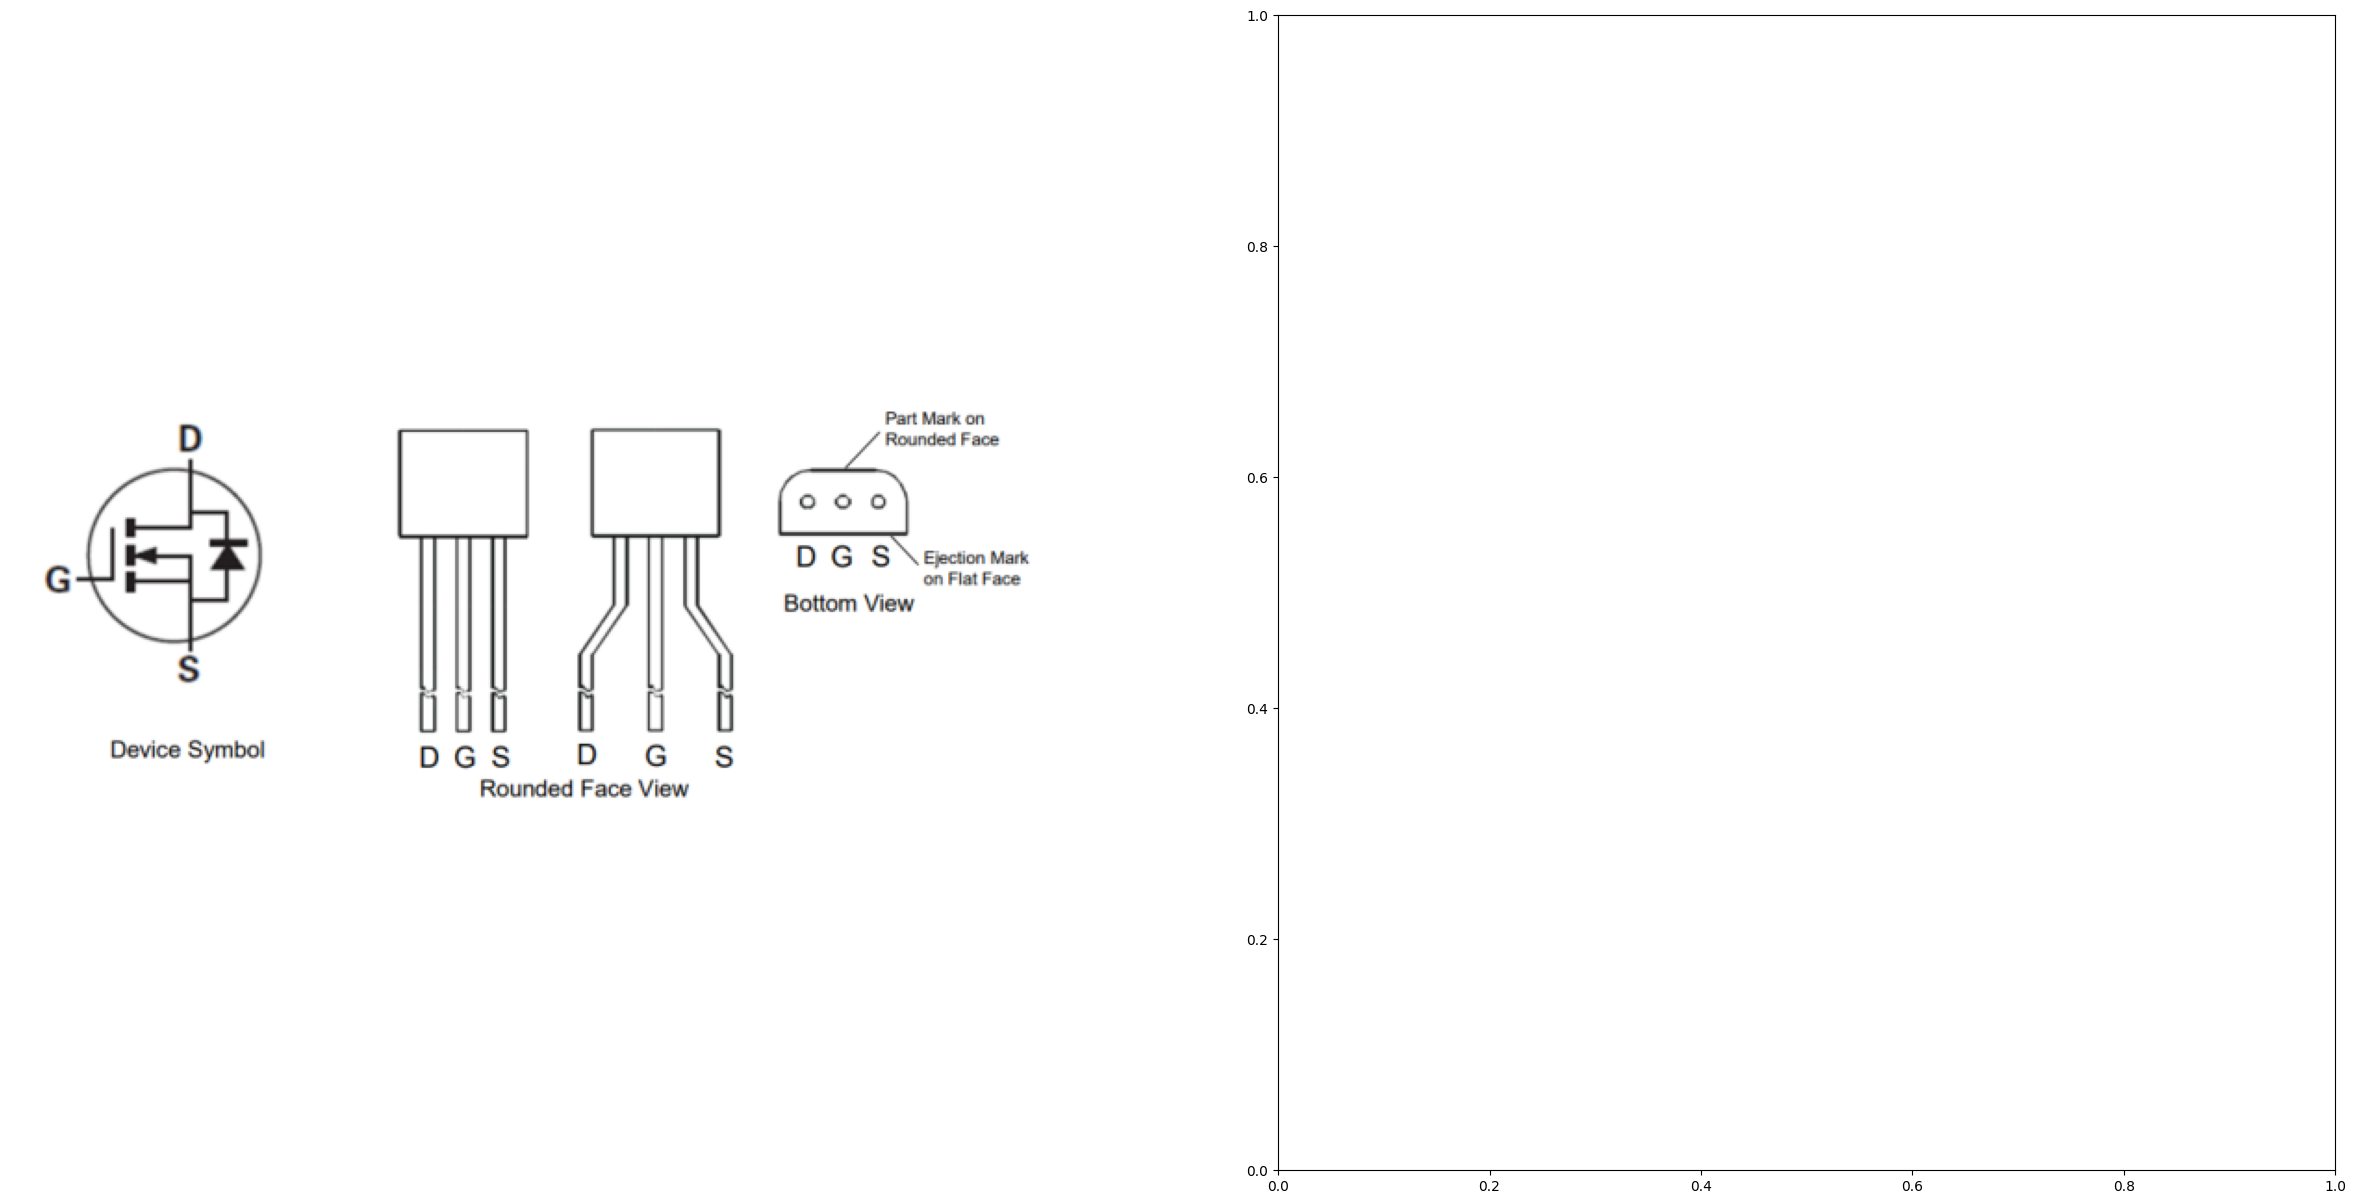

In [63]:
import fitz  # PyMuPDF
from PIL import Image
import matplotlib.pyplot as plt

# Function to convert a PDF page to an image
def pdf_page_to_image(pdf_path, page_num=0):
    pdf_document = fitz.open(pdf_path)
    page = pdf_document.load_page(page_num)  # Load the specified page
    pix = page.get_pixmap()  # Convert page to image
    img = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)
    return img

# Function to display two PDF pages side by side
def display_pdfs_side_by_side(rows, cols, pdfList):
    # Convert all PDF pages to images
    imgList = []
    for pdf in pdfList:
        imgList.append(pdf_page_to_image(pdf))

    # Create a new figure for nxm subplots (n row, m columns)
    if cols == 1 and rows == 1:
        #img = pdf_page_to_image(pdf_path)
        plt.imshow(imgList[0])
        plt.axis('off')
        plt.show()
        return
    
    fig, axes = plt.subplots(rows, cols, figsize=(30, 15), squeeze=False)
    
    # Display the various images

    for i in range(rows):
        print(i)
        if cols == 1:
            try:
                axes[i].imshow(imgList[i])
                axes[i].axis('off')
            except:
                pass
        else:
            for j in range(cols):
                try:
                    axes[i][j].imshow(imgList[i*cols+j])
                    axes[i][j].axis('off')
                except:
                    pass
    plt.show()


# Provide the paths to your two PDFs
pdfList = ['Media/BS107P.png']
rows = 1
cols = 2
display_pdfs_side_by_side(rows, cols, pdfList)


## Progettazione di massima del circuito

Il circuito che utilizzeremo è il seguente, l' obbiettivo è quello di osservare il comportamento di una porta NOT

misura di $R1 = 0.9946 \mathrm{k\Omega}$

Alimentando a $V_{DD} = 5V$ ci aspettiamo che $Q_1$ conduca molto e cortocircuiti con l' uscita a terra, quindi la corrente che ci aspettiamo è data solo dalla caduta di potenziale lungo $R1$, quindi $I_D = \mathrm{\frac{5V}{1k\Omega}\sim5mA}$ 




 In caratteristiche ci sono file che spazzano da $V_{gs}$ da 1.2 a 2 con scarti di 0.1, in ogni file spazzata $V_{ds}$ da 0 a 5

 all interno della cartella caratteristiche ogni valore vgs ha tre copie
 quindi 001, 002, 003 sono tutte misure di 1.2V   






 R1 = 9.973kOhm (task 5)
 
 



0


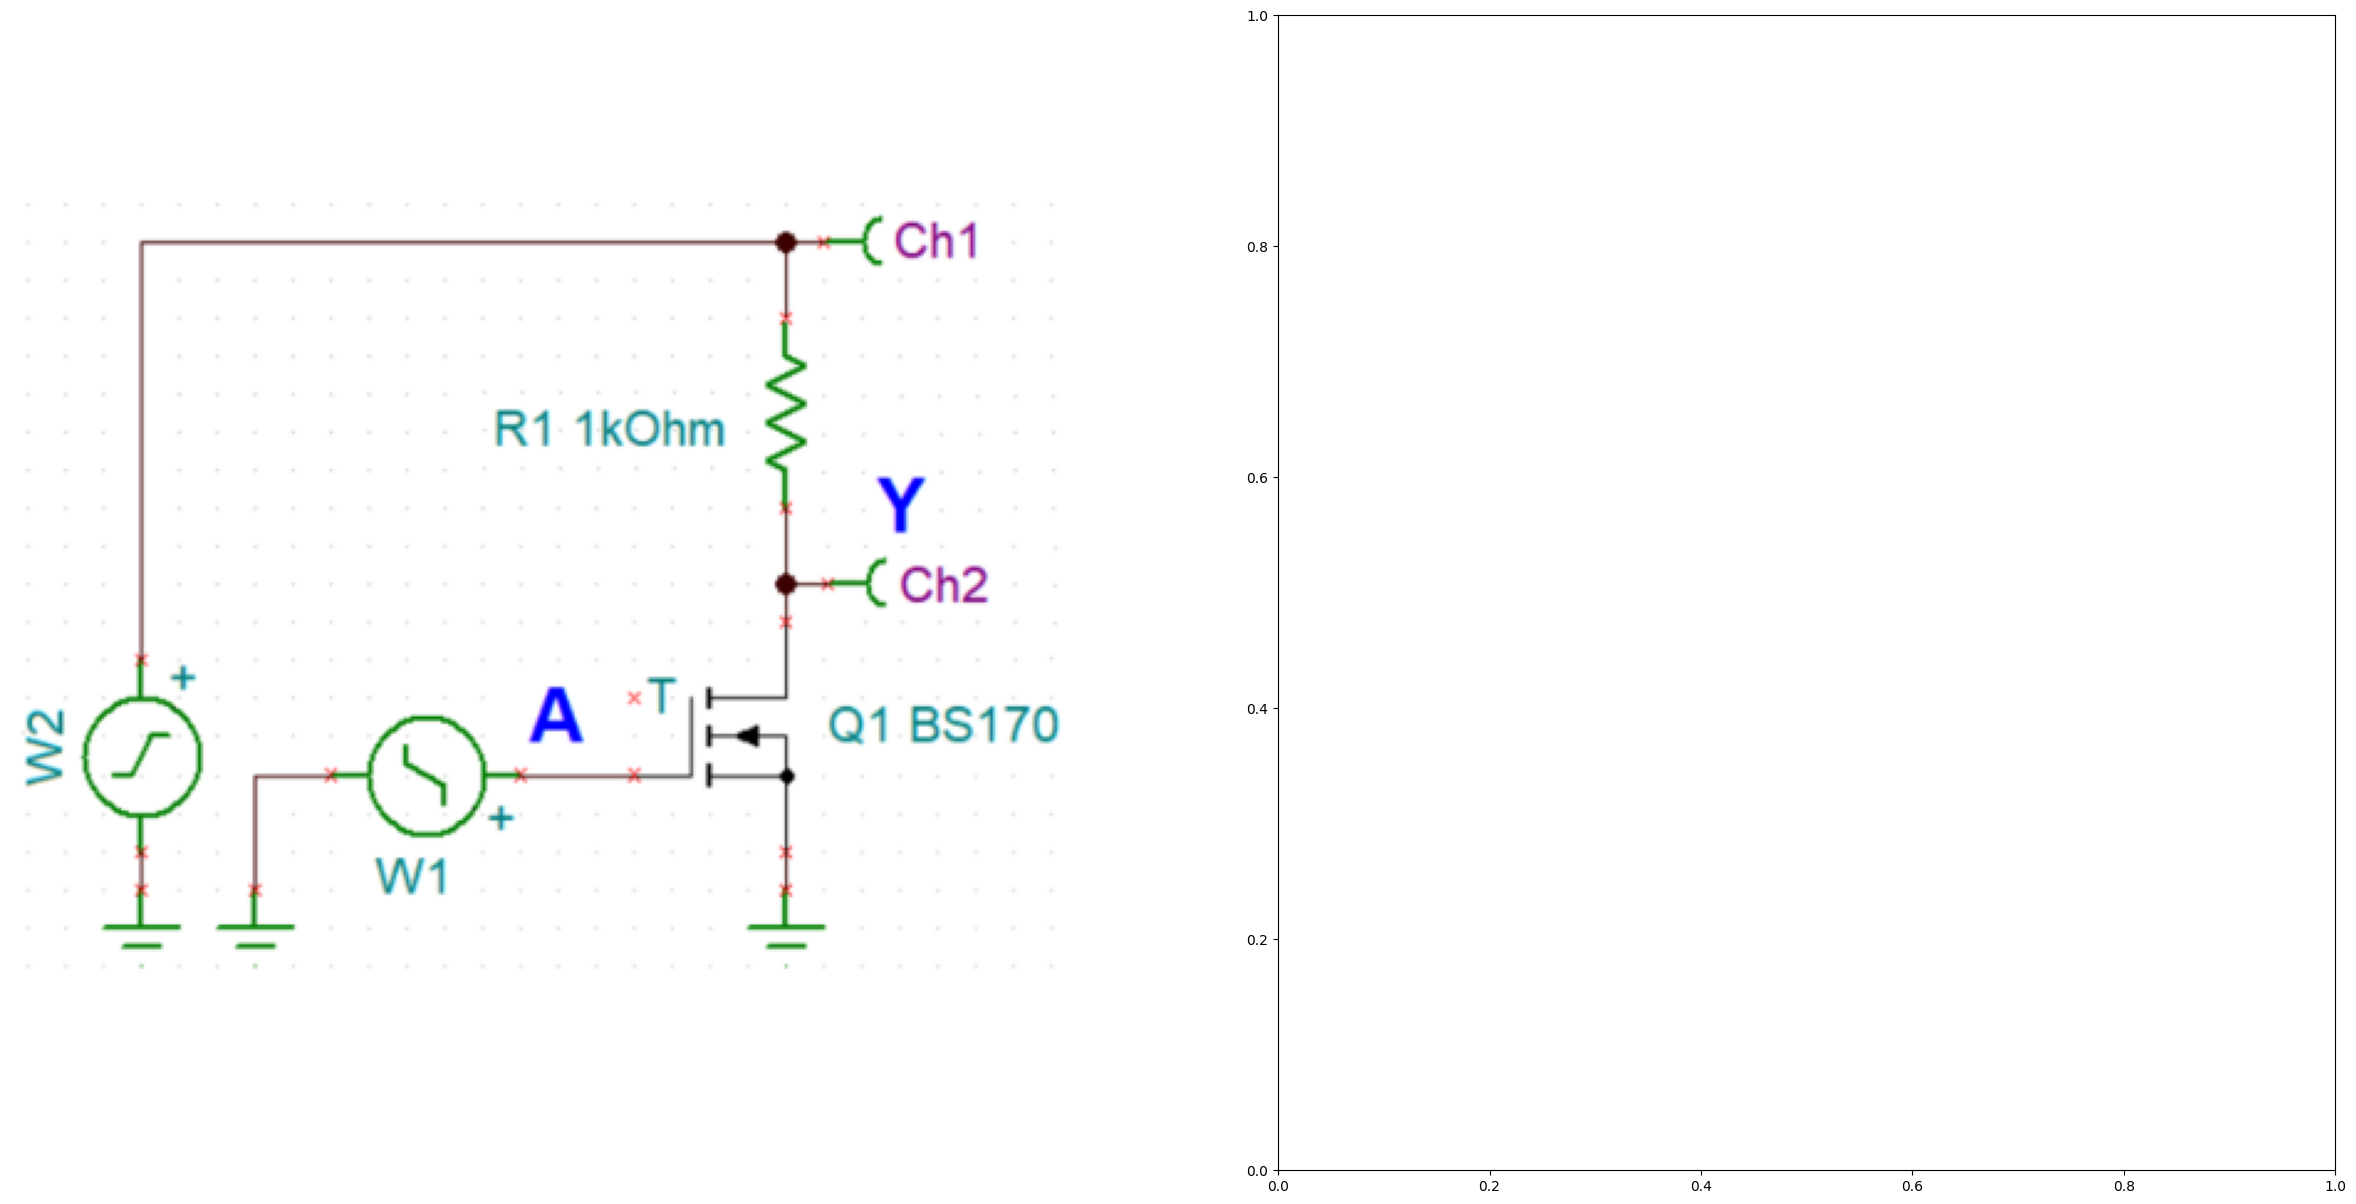

In [64]:
pdfList = ['Media/porta_NOT.png']
rows = 1
cols = 2
display_pdfs_side_by_side(rows, cols, pdfList)

## Curva caratteristica di $I_D (V_D)$

Vogliamo misurare $I_D$ in funzione di $V_D(V_{GS})$, spazziamo quindi sul valore di $V_{GS}$ da 1.2V a 2.0V, tramite intervalli di 0.1V, ripetiamo la misura tre volte per ogni votaggio per limitare il rumore e usiamo media e varianza per ricavare l errore di $I_D$ sui singoli voltaggi.

Il risultato è il seguente, notiamo che non rispetta l andamento $I_D \propto (V_{GS} - V_P - V_{DS}/2 ) V_{DS}$ 

0


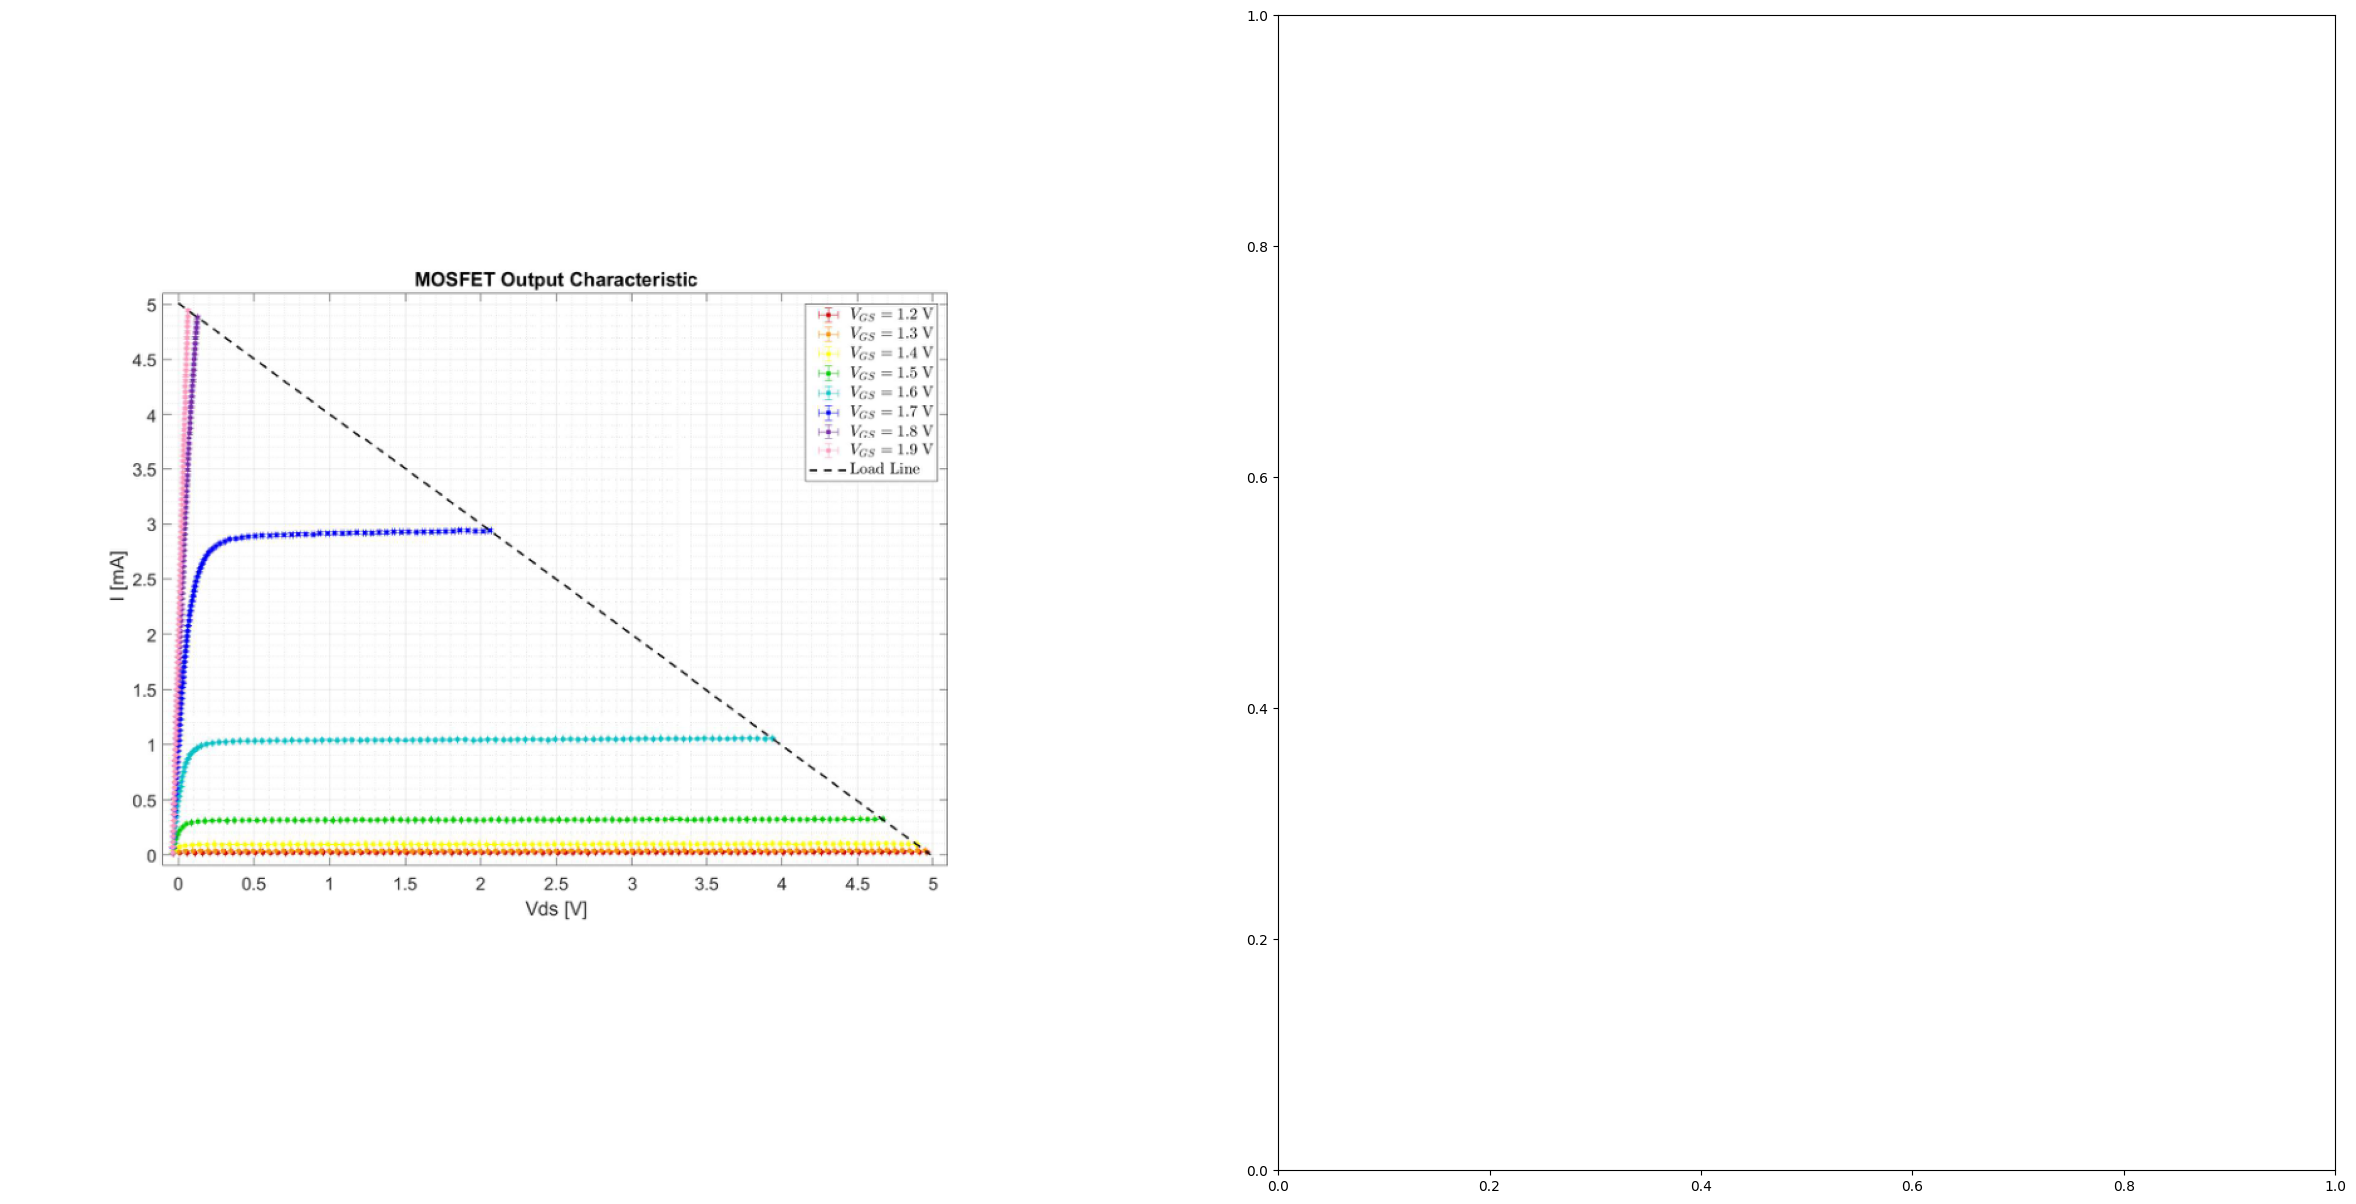

In [65]:
pdfList = ['Media/PortaNOT.pdf']
rows = 1
cols = 2
display_pdfs_side_by_side(rows, cols, pdfList)

## Porta universale NAND

In questa sezione utilizzeremo l' integrato CD4011BE, il suo voltaggio di alimentazione va da 3V a 18V, compatibile con le specifiche di ad2 riducendoci all intervallo 0V-5V
Di seguito la sua piedinatura e il circuito utilizzato.



0


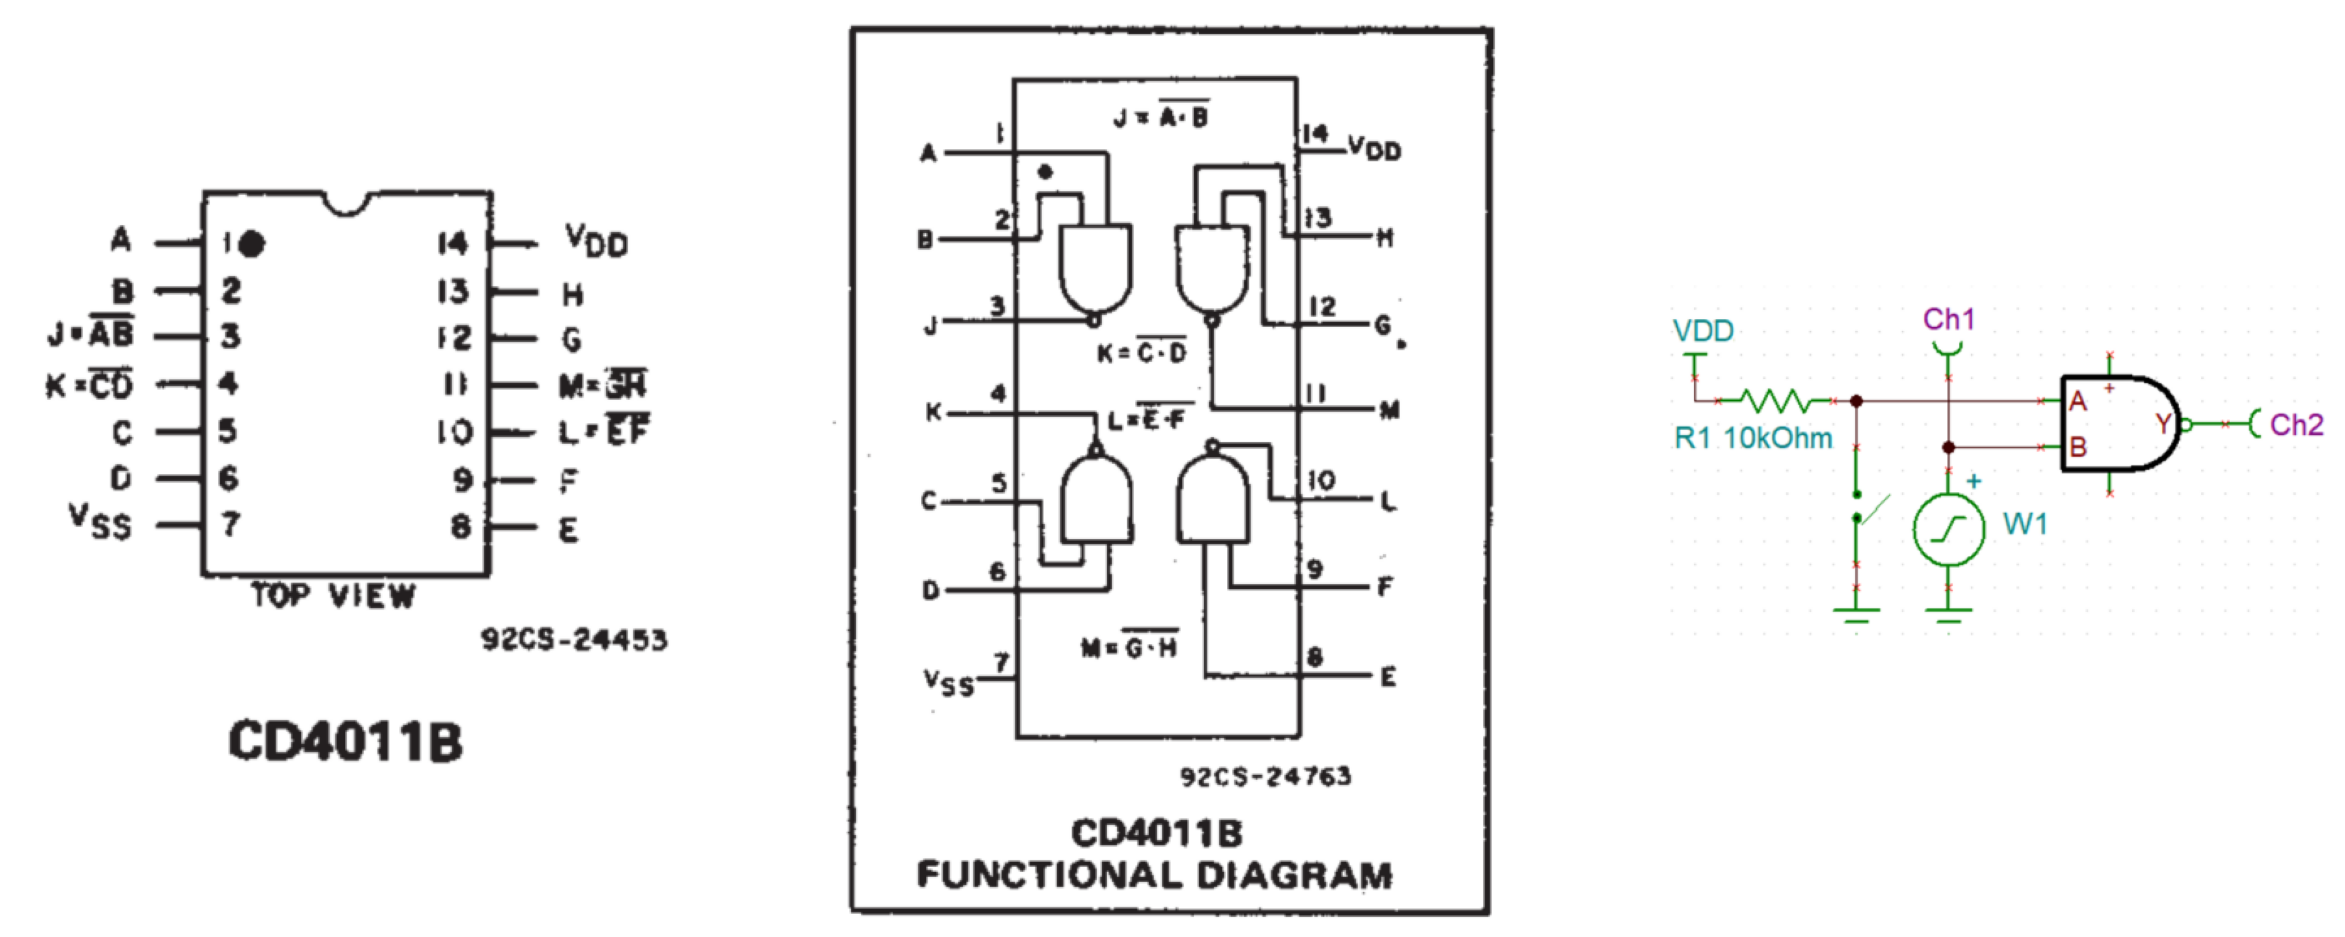

In [66]:
pdfList= ['Media/piedini_belli.png', 'Media/piedini_brutti.png', 'Media/porta_NAND.png']
rows = 1
cols = 3
display_pdfs_side_by_side(rows, cols, pdfList)



Per verificare il comportamento della porta NAND abbiamo costruito un circuito equivalente a quello richiesto, sostituendo l interruttore con un pulsante e mandando in input un onda quadra di ampiezza 5V.
Il pulsante premuto corrisponde all interruttore chiuso, quello non premuto al circuito aperto.
Si osserva un comportamento compatibile con la tabella di verità dell operatore logico NAND, 


0


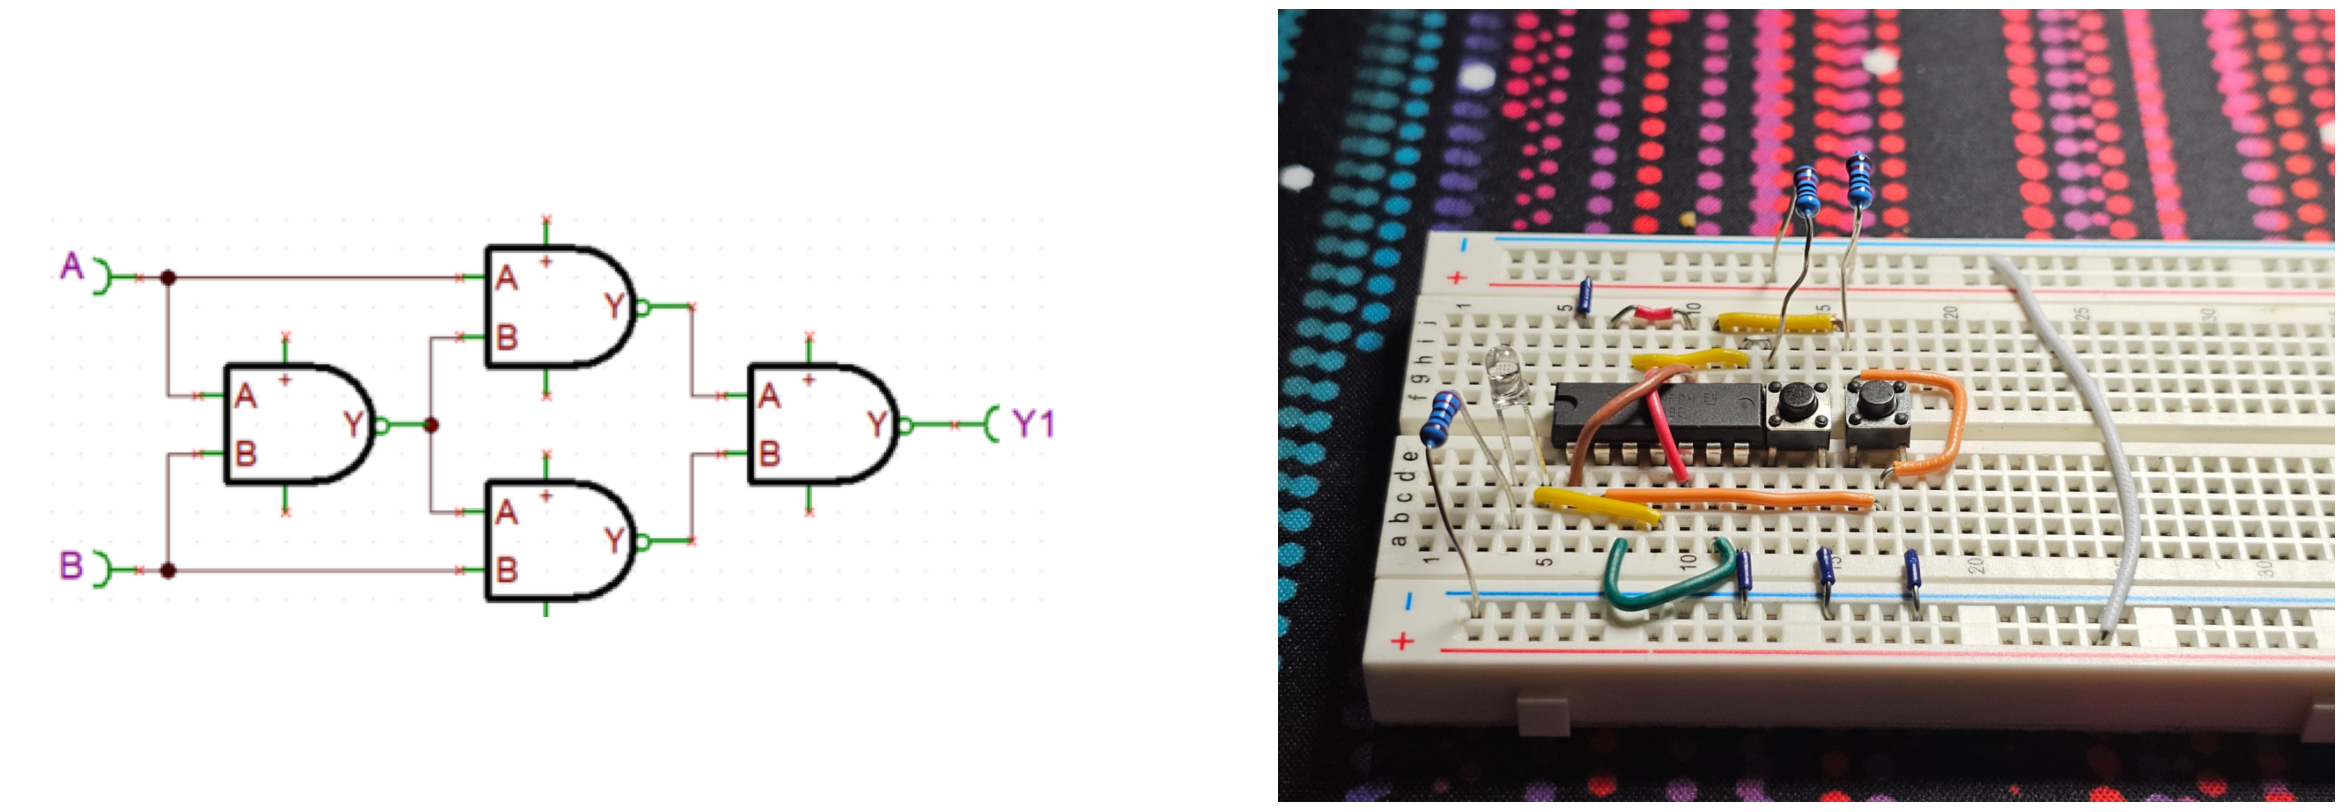

In [67]:
pdfList= ['Media/circuitoXOR.png', 'Media/foto_portaXOR.jpeg']
rows = 1
cols = 2
display_pdfs_side_by_side(rows, cols, pdfList)


## Porta XOR 

Dopo aver stabilito che il circuito soprastante sia un circuito XOR attraverso le tabelle di verità 

Per verificare la porta XOR abbiamo aggiunto un led al circuito in modo da utilizzarlo come indicatore del funzionamento nel seguente modo:
 
I due pulsanti forniscono input '1' e '0' nei punti 'A' e 'B' quando sono e non sono premuti rispettivamente, con input '1'= 5V, input '0' = 0V.

Il led è posizionato in 'Y1' e si accende solo se uno solo dei due pulsanti viene premuto.



